# K-means Clustering

#### Import and Setup
Importing libraries used in the code. This is only done once, no other imports appear in this notebook.

In [10]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<br>
Change working directory to /data/

In [4]:
# change working directory to /data/
os.chdir('..')
path = '{}/data'.format(os.getcwd())
os.chdir(path)
os.getcwd()

'/Users/skarmaniolos/Documents/Developer/Other/Iris/data'

<br>
Read the dataset from `.csv` into a pandas dataframe.

In [5]:
#import the dataset
df = pd.read_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<br>

#### Feature selection
The dataset has four features which will be selected and assigned to `x`.

In [8]:
x = df.iloc[:, [0,1,2,3]].values

<br>

#### K-means with $k=5$
Initially we will arbitrarily use $k=5$. We will implement clustering using $k=5$.

In [12]:
# using k = 5 
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 4 1 1 1 4 1 4 4 1 4 1 4 1 1 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 3 1 2 3 3 2 4 2 3 2 3
 3 3 1 3 3 3 2 2 1 3 1 2 1 3 2 1 1 3 2 2 2 3 1 1 2 3 3 1 3 3 3 1 3 3 3 1 3
 3 1]


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ]])

<br>
Use elbow method to help find the optimal number of clusters in a dataset.

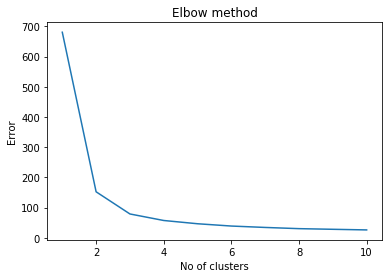

In [13]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The optimal value of $k$ is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph. Now that know this, we can implement k-means using $k=3$.

<br>

#### K-means with $k=3$
Now that we know that the optimal value of $k$ is between 2 and 4, we will implement with $k=3$.

In [14]:
# using k = 3 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans5.fit_predict(x)
print(y_kmeans3)

print(kmeans5.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 4 3 0 4 4 0 2 0 4 0 4
 4 4 3 4 4 4 0 0 3 4 3 0 3 4 0 3 3 4 0 0 0 4 3 3 0 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]


array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.52962963, 2.62222222, 3.94074074, 1.21851852],
       [6.22972973, 2.85135135, 4.76756757, 1.57297297],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

<br>

#### Visualise Clustering

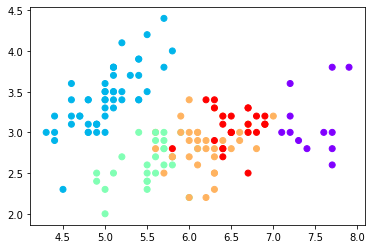

In [16]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')